In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Neko Atsume Database - Raw Data.csv')
kitty_keys = ['Name', 'Toy', 'Fish', 'Type', 'Silver Equivalent']
all_data = pd.DataFrame(df, columns=kitty_keys)
all_data


,Name,Toy,Fish,Type,Silver Equivalent
0,Snowball / Shironeko-san,Ball of yarn,3,Silver,3
1,Smokey / Kuroneko-san,Scratching board,5,Silver,5
2,Smokey / Kuroneko-san,Rubber ball (red),1,Silver,1
3,Shadow / Haiiro-san,Rubber ball (red),7,Silver,7
4,Sunny / Tobimike-san,Mister mouse,2,Silver,2
...,...,...,...,...,...
19304,Apricot / Kuriimutora-san,Fairy-tale parasol,4,Silver,4
19305,Ganache / Choco-san,Fairy-tale parasol,1,Silver,1
19306,Ganache / Choco-san,Fairy-tale parasol,2,Silver,2
19307,Ganache / Choco-san,Fairy-tale parasol,2,Silver,2


In [61]:
toys = pd.read_csv('Toy Size.csv')

In [70]:
subset = all_data[['Name', 'Toy', 'Fish', 'Type', 'Silver Equivalent']]

tuple_data = [tuple(x) for x in subset.values]
first_element = tuple_data[0]

In [71]:
toy_subset = toys[['Toy', 'Size']]

tuple_data1 = [tuple(x) for x in toy_subset.values]
first_element = tuple_data[0]


In [72]:
toy_stmt = "INSERT INTO toys (toy, size) VALUES (%s, %s)"

# we write a command to insert columns and values into the original table we 
# created, student_info.

cursor.executemany(toy_stmt, tuple_data1)
cnx.commit()


In [46]:
import mysql.connector
import config1
cnx = mysql.connector.connect(
    host = config1.host,
    user = config1.user,
    passwd = config1.password
)
cursor = cnx.cursor()
#cursor.execute("CREATE DATABASE cats")
cnx.database = 'cats'


In [59]:
# haven't run yet
create_query = """CREATE TABLE cat_table
    (name varchar(100),
    toy varchar(100),
    fish int,
    type varchar(100),
    silver_equivalent int
    );
"""
cursor.execute(create_query)
cursor = cnx.cursor()

In [60]:
stmt = "INSERT INTO cat_table (name, toy, fish, type, silver_equivalent) VALUES (%s, %s, %s, %s, %s)"

# we write a command to insert columns and values into the original table we 
# created, student_info.

cursor.executemany(stmt, tuple_data)
cnx.commit()


Text(0.5, 0.98, 'Cat Generosity')

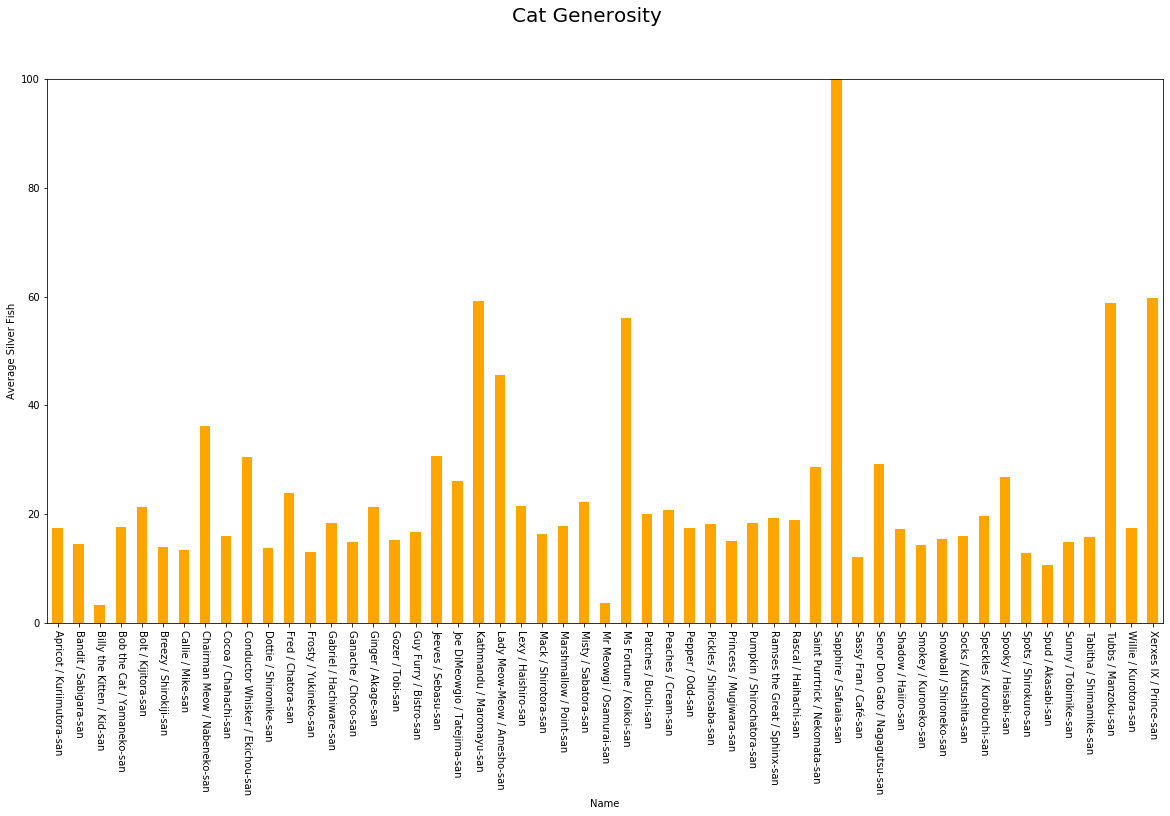

In [134]:

plt.ylim(0,100)
plt.xticks(rotation=0, fontsize= 'medium')
plt.ylabel('Average Silver Fish', fontsize=10)

all_data.groupby('Name')['Silver Equivalent'].mean().plot(kind='bar', figsize=(20,10), color='orange')
plt.xlabel('Name', fontsize=10)
plt.xticks(rotation=270, fontsize='medium')
plt.suptitle('Cat Generosity', fontsize=20)


In [136]:
## Connect to DB server on AWS
!pip install mysql-connector-python
import mysql.connector
# imports the python package, mysql
import config1
cnx = mysql.connector.connect(
    host = config1.host,
    user = config1.user,
    passwd = config1.password
)
cursor = cnx.cursor()
cursor.execute("CREATE DATABASE data_atsume")
cnx.database = 'data_atsume'


In [146]:
create_table = """CREATE TABLE data_atsume
    (cat_name varchar(100) PRIMARY KEY,
    toy varchar(100),
    fish int,
    type varchar(20),
    silver_equivalent int
    );
"""
cursor.execute(create_table)

In [147]:
stmt = "INSERT INTO data_atsume (Name, Toy, Fish, Type, Silver Equivalent) VALUES (%s, %s, %s)"


In [128]:
small_toys = pd.read_csv('small_toys', index_col=0)
small_ten = small_toys[0:10]

In [129]:
large_toys = pd.read_csv('large_toys', index_col=0)
large_ten = large_toys[0:10]

In [111]:

def add_value_labels(bar_graph, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for i in bar_graph.patches:
        # Get X and Y placement of label from rect.
        y_value = (i.get_height())
        x_value = (i.get_x() + i.get_width() / 2)

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(int(y_value))

        # Create annotation
        bar_graph.annotate(
            label,                      # Use `label` as label
            (int(x_value), y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(bar_graph)

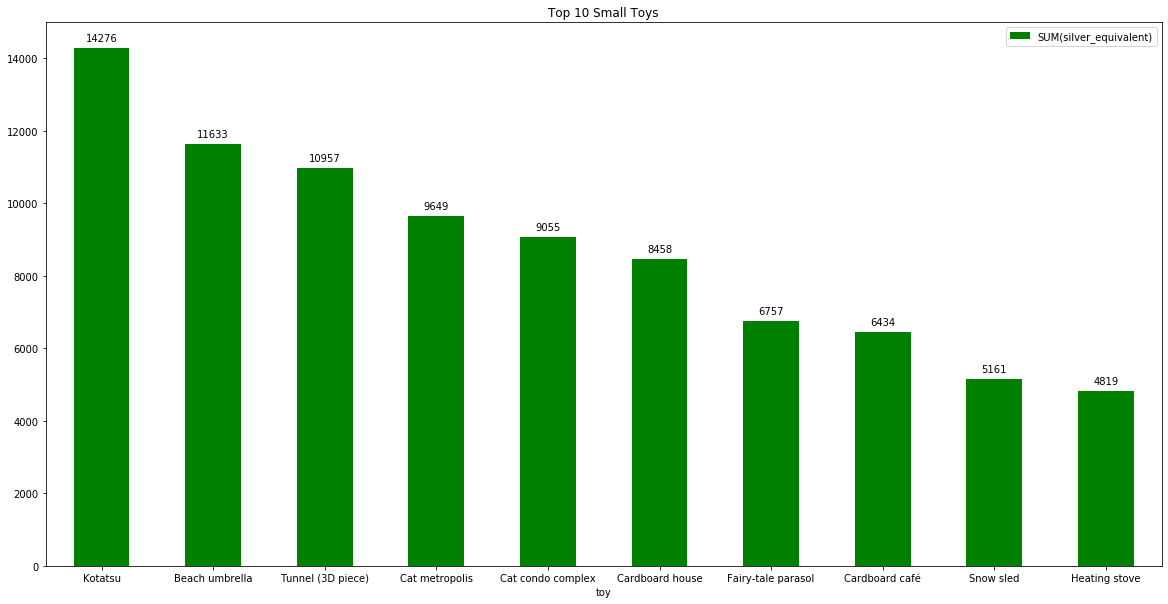

In [124]:
bar_graph = first_ten.plot(kind='bar', figsize=(20,10), rot=0, fontsize=10, color='green', title='Top 10 Small Toys')
add_value_labels(bar_graph)

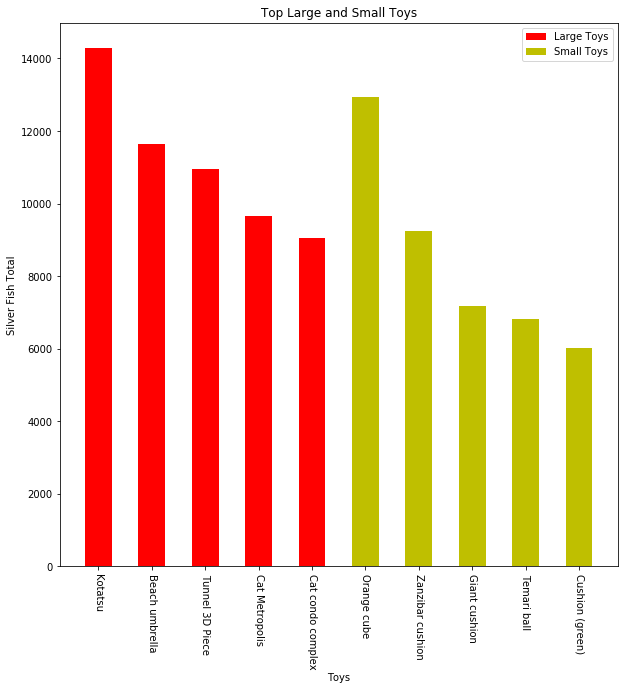

In [187]:
import matplotlib.pyplot as plt

# Uncomment the following line if you use ipython notebook
# %matplotlib inline

width = 0.5      # the width of the bars

large_toys = {'Kotatsu': 14276, 'Beach umbrella': 11633, 'Tunnel 3D Piece': 10957, 'Cat Metropolis': 9649, 'Cat condo complex': 9055}

rects1 = plt.bar(large_toys.keys(), large_toys.values(), -width, color='r', label='Large Toys')

small_toys = {'Orange cube': 12948, 'Zanzibar cushion': 9235, 'Giant cushion': 7187, 'Temari ball': 6812, 'Cushion (green)': 6018}

rects2 = plt.bar(small_toys.keys(), small_toys.values(), +width,color='y', label='Small Toys')

# add some text for labels, title and axes ticks
plt.xlabel('Toys')
plt.ylabel('Silver Fish Total')
plt.title('Top Large and Small Toys')
plt.legend()
plt.xticks(rotation=270)
plt.rcParams["figure.figsize"] = (10,10)
